In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Activation,BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Using TensorFlow backend.


**Import Statements**

**Exploring the data a little bit**

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


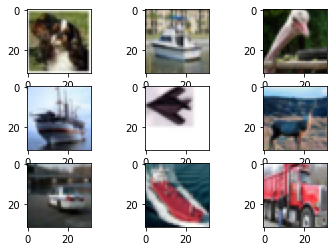

In [3]:
def explore_data():
  (trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
  print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
  print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
  # plot first few images
  for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[500+i])
  # show the figure
  pyplot.show()

explore_data()

**Function to load the data set and split into training and testing data sets**

In [4]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

**This function will preprocess the images and normalize the pixel values**

In [11]:
def preprocess_pixel_values(train, test):
	train_norm = (train.astype('float32') / 255.0)
	test_norm = (test.astype('float32') / 255.0)
	return train_norm, test_norm

**This is the code for the model used to train**

In [5]:
def make_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.1))

  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.1))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(10, activation='softmax'))
  opt = RMSprop(learning_rate=0.0001, decay=1e-6)
  return model,opt



**Main function**

In [20]:
def main():
  explore_data()
  train_X,train_Y,test_X,test_Y = load_dataset()
  print("DATASET LOADING DONE")
  train_X,test_X = preprocess_pixel_values(train_X,test_X)
  print("PIXEL PROCESSING DONE")
  model,opt = make_model()
  print("MODEL OBTAINED")
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  print("MODEL COMPILED")
  history = model.fit(train_X, train_Y, epochs=50, batch_size=100, validation_data=(test_X, test_Y))
  print("MODEL FIT")
  evaluation,accuracy = model.evaluate(test_X,test_Y)
  print(accuracy)
  model.save('final_model.h5')
  model.summary()
  display_graph(history)
  evaluate_model(model,test_X,test_Y)

**Model Evaluation and printing test loss and accuracy**

In [21]:
def evaluate_model(model,test_X,test_Y):
  score = model.evaluate(test_X, test_Y)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

**Displays graphs for losses and accuracies**

In [22]:
def display_graph(history): 
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 50), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 50), history.history["val_loss"], label="val_loss")
  plt.title("Training Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc="lower left")
  plt.show()
  plt.plot(np.arange(0, 50), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 50), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower left")
  plt.show()



**Calling the main function. Kindly run the previous cells before this. Use a GPU enabled runtime for optimal performance (Takes 9-10 minutes)**

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


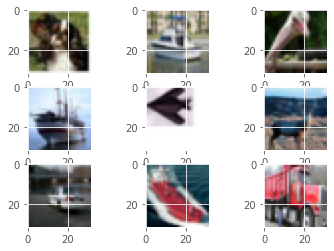

DATASET LOADING DONE
PIXEL PROCESSING DONE
MODEL OBTAINED
MODEL COMPILED
Epoch 1/50
500/500 [==============================] - 7s 14ms/step - loss: 1.9982 - accuracy: 0.3076 - val_loss: 2.1537 - val_accuracy: 0.2124
Epoch 2/50
500/500 [==============================] - 7s 14ms/step - loss: 1.5739 - accuracy: 0.4309 - val_loss: 1.3798 - val_accuracy: 0.5000
Epoch 3/50
500/500 [==============================] - 7s 14ms/step - loss: 1.4129 - accuracy: 0.4918 - val_loss: 1.3013 - val_accuracy: 0.5206
Epoch 4/50
500/500 [==============================] - 7s 14ms/step - loss: 1.3023 - accuracy: 0.5333 - val_loss: 1.2001 - val_accuracy: 0.5713
Epoch 5/50
500/500 [==============================] - 7s 14ms/step - loss: 1.2144 - accuracy: 0.5672 - val_loss: 1.1863 - val_accuracy: 0.5653
Epoch 6/50
500/500 [==============================] - 7s 14ms/step - loss: 1.1517 - accuracy: 0.5916 - val_loss: 1.1989 - val_accuracy: 0.5633
Epoch 7/50
500/500 [==============================] - 7s 14ms/step - 

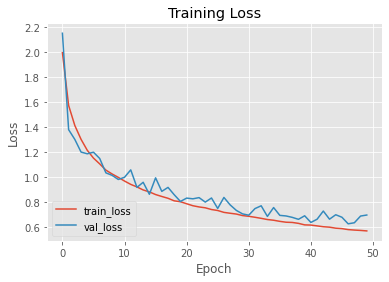

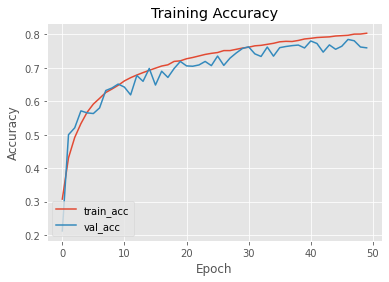

313/313 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.7597
Test loss: 0.6948280930519104 / Test accuracy: 0.7597000002861023


In [23]:
main()